In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('IRIS.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
data['Species'] = data['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

In [8]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [37]:
X_train, X_test, y_train, y_test = train_test_split(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']],data['Species'], test_size=0.4)

In [38]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
59,5.2,2.7,3.9,1.4
94,5.6,2.7,4.2,1.3
37,4.9,3.1,1.5,0.1
142,5.8,2.7,5.1,1.9
84,5.4,3.0,4.5,1.5
...,...,...,...,...
8,4.4,2.9,1.4,0.2
129,7.2,3.0,5.8,1.6
48,5.3,3.7,1.5,0.2
95,5.7,3.0,4.2,1.2


In [39]:
y_train

59     2
94     2
37     1
142    3
84     2
      ..
8      1
129    3
48     1
95     2
117    3
Name: Species, Length: 90, dtype: int64

In [46]:
from sklearn import linear_model
mymodel = linear_model.LogisticRegression(max_iter=120)
mymodel.fit(X_train,y_train)

LogisticRegression(max_iter=120)

In [47]:
mymodel.predict(X_test)

array([2, 3, 3, 3, 2, 2, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 2, 1, 2, 2, 3, 2,
       2, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 2, 1, 3, 1, 2, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 2, 1, 3, 3])

In [48]:
mymodel.score(X_test, y_test)

0.9833333333333333

In [49]:
predicted_output = mymodel.predict(X_test)
predicted_output

array([2, 3, 3, 3, 2, 2, 1, 3, 1, 3, 3, 1, 3, 3, 2, 3, 2, 1, 2, 2, 3, 2,
       2, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 2, 2, 1, 3, 1, 2, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 2, 1, 3, 3])

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_output)
cm


array([[18,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 26]])

Text(24.0, 0.5, 'Truth or Actual Value')

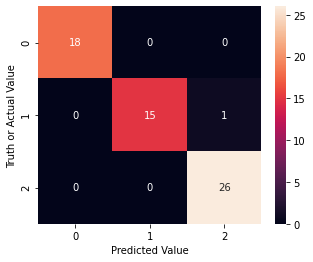

In [53]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')